Diabetes Prediction Random Forest Optimimization

Importing libraries

In [19]:
import pandas as pd

Step 1 👉 Data Ingestion

In [20]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.0,84.0,0.0,0.0,0.0,0.304,21.0,0
1,9.0,112.0,82.0,0.0,28.2,1.282,50.0,1
2,1.0,139.0,46.0,83.0,28.7,0.654,22.0,0
3,0.0,161.0,50.0,0.0,21.9,0.254,65.0,0
4,6.0,134.0,80.0,370.0,46.2,0.238,46.0,1


In [21]:
X_train = train_data.drop(["Outcome"], axis = 1)
y_train = train_data["Outcome"]
X_test = test_data.drop(["Outcome"], axis = 1)
y_test = test_data["Outcome"]

This code is used to split a dataset into features (X) and the target variable (y) in the context of training and testing

Step 2 👉 Model initialization and training

🎄Random Forest Model 1

In [22]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators = 60, 
    random_state = 42,
    criterion = 'gini', #default value
    n_jobs = -1, #default value
    min_samples_leaf = 1, #default value
    min_samples_split = 2, #default value
    max_features = 'sqrt', #default value
    max_depth = None, #default value
    bootstrap = True, #default value
    )
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=60, n_jobs=-1, random_state=42)

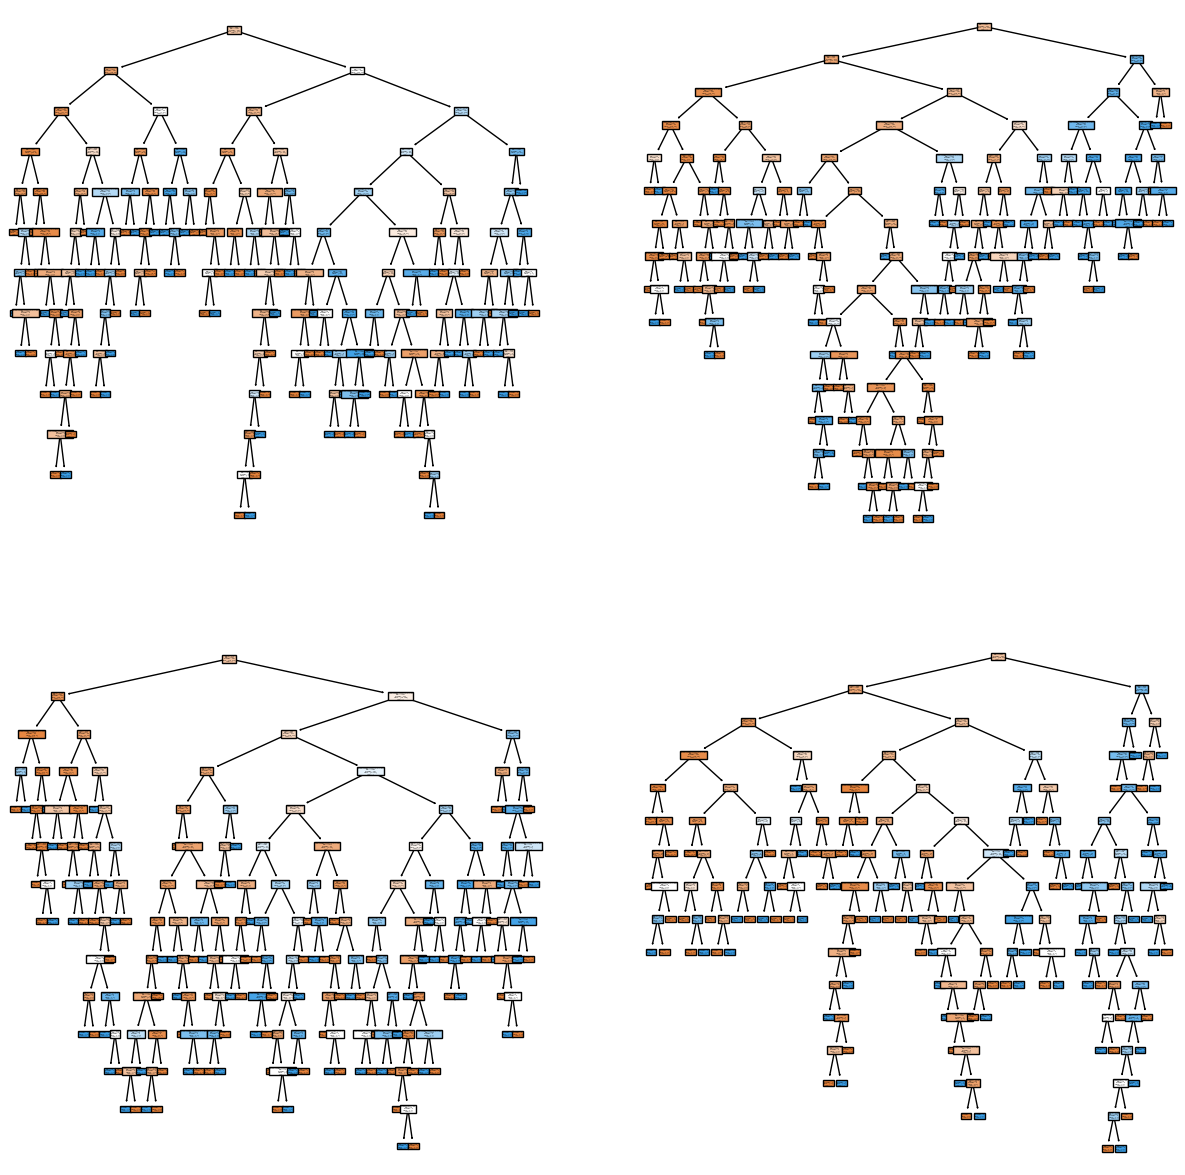

In [23]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = fig, axis = plt.subplots(2, 2, figsize = (15, 15))

# We show the first 4 trees of the 100 generated (by default)
tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

fig.savefig('tree.png')

Step 3 👉 Model Predict ���

In [24]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

This code performs a class prediction using the trained model. Here is the step by step of what the code does:

y_pred = model.predict(X_test): Uses the predict method of the model to predict the classes of the test examples (X_test). This returns an array of predictions (y_pred) for each example in X_test.

y_pred: Then, print the predictions made. This will give us an idea of ​​what class the model has predicted for each test example.

In [25]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7727272727272727

Step 4 👉 Save model on file 💾

In [26]:
from pickle import dump

dump(model, open("../models/ranfor_classifier_nestimators-60_42.sav", "wb"))

Load previous model from file 💾

In [27]:
'''from sklearn.ensemble import RandomForestClassifier
import pickle

# Load file from .sav
model = pickle.load(open("../models/ranfor_classifier_nestimators-60_42.sav", "rb"))

# Use the model to make predictions
predictions = model.predict(X_test)'''

'from sklearn.ensemble import RandomForestClassifier\nimport pickle\n\n# Load file from .sav\nmodel = pickle.load(open("../models/ranfor_classifier_nestimators-60_42.sav", "rb"))\n\n# Use the model to make predictions\npredictions = model.predict(X_test)'

🎄Random Forest Model 2

In [28]:
model_2 = RandomForestClassifier(random_state = 42)
model_2.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
from sklearn.model_selection import GridSearchCV
import numpy as np

hyperparams = {
    "n_estimators": [np.arange(2,50)] + [100],
    "bootstrap" : [False, True],
    "max_features": ["auto", "sqrt", "log2"],
    "min_samples_split": np.arange(1,10),
    "max_depth" : [np.arange(4,12)]+ [None],
    "random_state" : [42],
}

grid = GridSearchCV(model_2, hyperparams, scoring = "accuracy", cv = 5, refit=True)
grid

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [False, True],
                         'max_depth': [array([ 4,  5,  6,  7,  8,  9, 10, 11]),
                                       None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': [array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                          100],
                         'random_state': [42]},
             scoring='accuracy')

In [30]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {grid.best_params_}")

Mejores hiperparámetros: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 100, 'random_state': 42}


In [31]:
grid_model = RandomForestClassifier(bootstrap= False, max_depth= None, min_samples_split= 4, n_estimators= 100, random_state = 42)
grid_model.fit(X_train, y_train)

y_pred_grid = grid_model.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred_grid)

0.7467532467532467

In [39]:
dump(model, open("../models/best_model_optimizer_bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 100, 'random_state': 42", "wb"))

🎄Random Forest Model 3

In [32]:
model_3 = RandomForestClassifier(random_state = 42)
model_3.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
#Charlie Method

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

hyperparams = {
    "n_estimators": [np.arange(2, 50)] + [100],
    "bootstrap": [False, True],
    "min_samples_split": np.arange(1, 10),
    "max_depth": [np.arange(4, 12)] + [None],
}

model_3 = RandomForestClassifier()

grid_search = GridSearchCV(model, hyperparams, scoring="accuracy", cv=5, refit=True)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)

print("Best parameters:", best_params)

Best parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_split': 4, 'n_estimators': 100}


In [34]:
# Calcular la precisión del modelo en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)

# Imprimir los mejores parámetros y la precisión
print("Best parameters:", best_params)
print("Accuracy on test set:", accuracy)

Best parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_split': 4, 'n_estimators': 100}
Accuracy on test set: 0.7727272727272727


In [ ]:
dump(model, open("../models/best_model_optimizer_charlie_method_bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 4, 'n_estimators': 100, 'random_state': 42", "wb"))

Create the requirements.txt file.
bash 👉 pip freeze > requirements.txt